# Computer Vision Problem

The training and testing datasets are given in PKL file format, we need to extract the data sets from it. We are importing pickle library for that.

In [1]:
import pickle

First let us get the train_label

In [2]:
with open('train_label.pkl','rb') as f:
    train_label=pickle.load(f)

Next, we are extracting the train_image

In [3]:
with open('train_image.pkl','rb') as f:
    train_image=pickle.load(f)

Some dependencies that we need. We are using Tensorflow API. For working with datasets we are using Numpy Framework. MatplotLib is needed to visualise the data set.

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

/home/sayangdipto/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Converting the train_image to a numpy array.

In [5]:
train_image=np.array(train_image)

Let us find the shape of the train_image dataset, to help us visualise it better.

In [6]:
train_image.shape

(8000, 784)

The train_image numpy array is a 8000 x 784 matrix. Let's see the length of train_label to find out the number of datas.

In [7]:
len(train_label)

8000

So since the length of train_label is 8000, the number of datasets in train_image must also be 8000. That means 784 must be a 2D matrix of size 28 x 28. So we are reshaping train_image to a 3D matrix of order 8000 x 28 x 28.

In [8]:
train_image=train_image.reshape(8000,28,28)

Confirming that we have got the right shape as needed.

In [9]:
train_image.shape

(8000, 28, 28)

Let's see how the first image looks like.

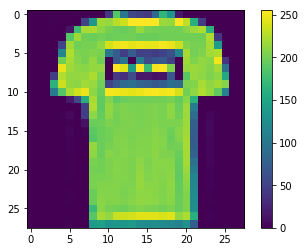

In [10]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

Let's visualise the first 25 images and their respective classes. Looks like upper garments have class 0.

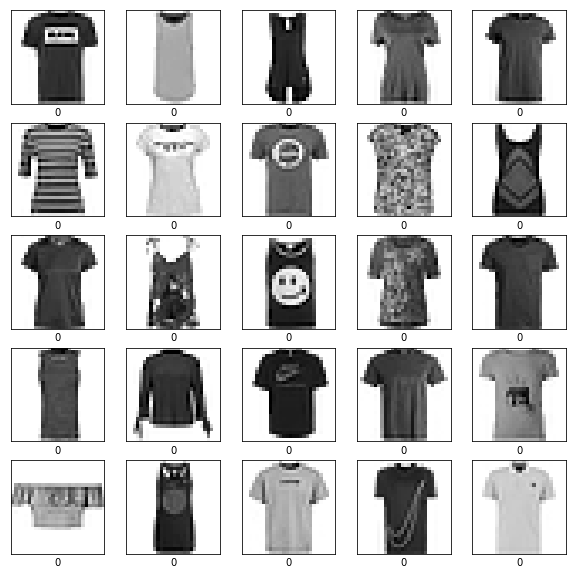

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

Let us now extract our test data and similarly shape it as train data.

In [12]:
with open('test_image.pkl','rb') as f:
    test_image=pickle.load(f)
test_image=np.array(train_image)
test_image=test_image.reshape(8000,28,28)
test_image.shape

(8000, 28, 28)

We scale the values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way.

In [13]:
train_image = train_image / 255.0

test_image = test_image/ 255.0

Building the neural network by configuring the layers of the model, then compiling the model.

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Loss function measures how accurate the model is during training.

Optimizer is how the model is updated based on the data it sees and its loss function.

Metrics is used to monitor the training and testing steps.

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Next we feed the training data to the model and number of epochs.

In [16]:
model.fit(train_image, train_label, epochs=50)

Epoch 1/50
8000/8000 [==============================] - 3s 388us/step - loss: 0.6308 - acc: 0.7612
Epoch 2/50
8000/8000 [==============================] - 2s 279us/step - loss: 0.5159 - acc: 0.8054
Epoch 3/50
8000/8000 [==============================] - 2s 295us/step - loss: 0.4798 - acc: 0.8149
Epoch 4/50
8000/8000 [==============================] - 2s 270us/step - loss: 0.4513 - acc: 0.8249
Epoch 5/50
8000/8000 [==============================] - 2s 259us/step - loss: 0.4257 - acc: 0.8331
Epoch 6/50
8000/8000 [==============================] - 2s 263us/step - loss: 0.4051 - acc: 0.8430
Epoch 7/50
8000/8000 [==============================] - 2s 256us/step - loss: 0.3863 - acc: 0.8495
Epoch 8/50
8000/8000 [==============================] - 2s 255us/step - loss: 0.3830 - acc: 0.8465
Epoch 9/50
8000/8000 [==============================] - 2s 255us/step - loss: 0.3646 - acc: 0.8592
Epoch 10/50
8000/8000 [==============================] - 2s 259us/step - loss: 0.3517 - acc: 0.8632
Epoch 11/

With the model now trained, we use it to make predictions about our test_images.

In [17]:
predictions=model.predict(test_image)

np.argmax is used to get the highest value of each prediction. Let's find that for the first image. So our model classifies it to the 0 -th class that is class of upper garment.

In [18]:
np.argmax(predictions[0])

0

Let's now see if the 1st image in our test data is actually an upper garment.

Turns out it is, so our model must be working fine.

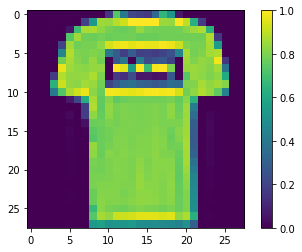

In [19]:
plt.figure()
plt.imshow(test_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

image_index creates a list of length 8000 (same as the number of elements in our dataset) starting from 0.

predicted_class contains the value of the classes predicted for each image by our model.

In [20]:
image_index=list(range(0,8000))
predicted_class=[]
for i in range (8000):
    predicted_class.append(np.argmax(predictions[i]))

Now let us create a 2D list to store into the CSV File.

In [21]:
X=list(zip(image_index,predicted_class))

Append the 0-th index by column names and finally display the list.

In [22]:
X.insert(0,('Test_image_index','predicted_class'))

In [23]:
X

[('Test_image_index', 'predicted_class'),
 (0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 0),
 (38, 0),
 (39, 0),
 (40, 0),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 0),
 (54, 0),
 (55, 0),
 (56, 0),
 (57, 0),
 (58, 0),
 (59, 0),
 (60, 0),
 (61, 0),
 (62, 0),
 (63, 0),
 (64, 0),
 (65, 6),
 (66, 0),
 (67, 0),
 (68, 0),
 (69, 0),
 (70, 0),
 (71, 0),
 (72, 0),
 (73, 0),
 (74, 0),
 (75, 0),
 (76, 0),
 (77, 0),
 (78, 0),
 (79, 0),
 (80, 0),
 (81, 0),
 (82, 3),
 (83, 0),
 (84, 0),
 (85, 0),
 (86, 0),
 (87, 0),
 (88, 0),
 (89, 0),
 (90, 0),
 (91, 0),
 (92, 0),
 (93, 0),
 (94, 0),
 (95, 0),
 (96, 0)

Import CSV and use it to write our list in sayangdiptochakraborty.csv file.

In [24]:
import csv

with open('sayangdiptochakraborty.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(X)
csvFile.close()